# Lista de Exercício 7
### Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste em 3 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_7.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_7.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Bruno Paiva Sant'Anna`

`Número USP: 11819507`

### Introdução:

Vamos importar as bibliotecas que utilizaremos durante essa prática!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática.

In [2]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_07/image_degrau2.tif", "img_degrau.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


### 1) Filtragem do ruído não dependente do sinal (3.0/10.0)

Nesta prática, iremos trabalhar um tipo de degração conhecida como ruído. De início, discutiremos sobre um ruído não dependende do sinal. Um dos exemplos desta categoria é o ruído Gaussiano.

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_07/ruidoGaussiano.gif" style="width:836px;height:266px;" width="980" height="300"></center>

<center><caption><b> Figura 1:</b> Imgens degradadas com diferentes níveis de ruído Gaussiano.</b></caption></center>

As principais fontes de ruídos gaussianos em imagens digitais estão relacionados ao ruído térmico durante a aquisição. Em processamento de imagens digitais, o ruído gaussiano pode ser reduzido utilizando-se técnicas de filtros espaciais, que suavizam os ruídos contidos na imagem, com a desvantagem de borrá-la.

1.1) Para analisar as características dessa degradação, vamos utilizar uma imagem degrau com diferentes níveis de cinza. Siga os passos abaixo:

1. Carregue a imagem "img_degrau.tif".
2. Agora vamos inserir ruído na imagem com desvio padrão = 7. Para isso vamos usar uma função de nome ``` InsertNoiseAWGN``` . Já disponibilizamos o escopo da função e uma descrição das entradas e saídas. Comente o que cada linha da função está exercendo.
3. Mostre, lado a lado, a imagem original, a imagem degradada (ruidosa)  e a imagem contendo somente o ruído Gaussiano (que fora adicionado à imagem original no exercício anterior).

   *   Dica:  Fazendo a subtração da imagem ruidosa pela imagem original, o que sobra é somente o ruído que foi adicionado.
   
4. Calcule a média e variância **sobre cada degrau de cinza** na imagem ruidosa e em seguida plote o gráfico de Média (Eixo X) e Variância (Eixo Y).
5. Comente sobre o comportamento da variância em relação à média.


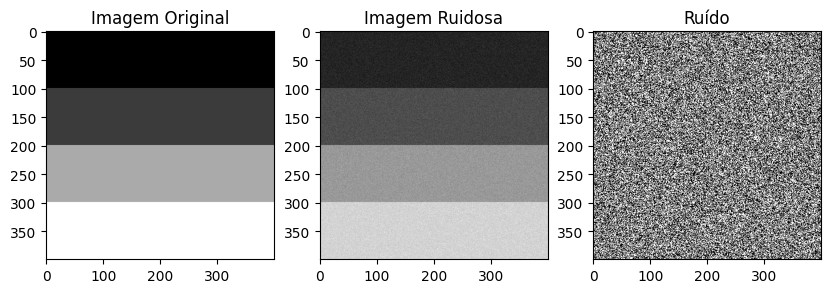

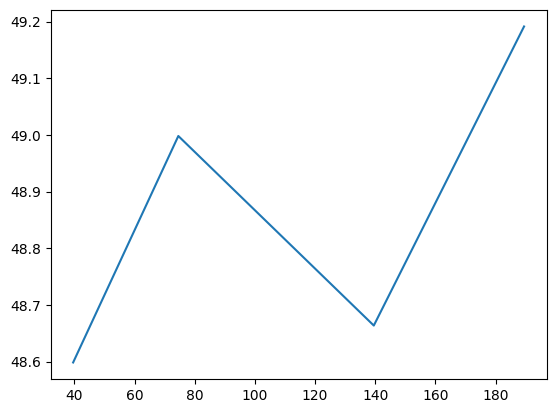

In [15]:
def InsertNoiseAWGN(img, stdNoise):
  '''
  Entrada:
    - img: Imagem de entrada (uint8).
    - stdNoise: Desvio padrão do ruído.

  Saída:
    - imgNoisy: Imagem com ruído AWGN .
  '''
  nRows, nCols = img.shape # Pega o shape da imagem
  noise =  stdNoise * np.random.normal(size=(nRows,nCols)).astype(float) # Cria um perfil de ruído para a imagem inteira
  imgNoisy = img + noise # Adiciona o ruído na imagem
  imgNoisy = imgNoisy.astype('uint8') # Converte a imagem para uint8
  return imgNoisy # Retorna a imagem

# Seu código começa aqui #
# Carregando a imagem
img1 = cv.imread('img_degrau.tif', cv.IMREAD_UNCHANGED)

# Adicionanado o ruído
img1_noise = InsertNoiseAWGN(img1, 7)

# Mostrando as imagens
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10,14))

ax0.imshow(img1, cmap='gray')
ax0.set_title('Imagem Original')
ax1.imshow(img1_noise, cmap='gray')
ax1.set_title('Imagem Ruidosa')
ax2.imshow(img1_noise - img1, cmap='gray')
ax2.set_title('Ruído')
plt.show()

# Calculando a variância
step1_noise = img1_noise[0:100,:]
step2_noise = img1_noise[100:200,:]
step3_noise = img1_noise[200:300,:]
step4_noise = img1_noise[300:,:]

mean_noise = []
mean_noise.append(np.mean(step1_noise))
mean_noise.append(np.mean(step2_noise))
mean_noise.append(np.mean(step3_noise))
mean_noise.append(np.mean(step4_noise))

var_noise = []
var_noise.append(np.var(step1_noise))
var_noise.append(np.var(step2_noise))
var_noise.append(np.var(step3_noise))
var_noise.append(np.var(step4_noise))

# Mostrando Variância x Média
plt.plot(mean_noise, var_noise)
plt.show()

# Seu código termina aqui #

# Comentários:
# A variância em cada região da imagem está muito próxima de uma média, que é dada pelo quadrado
# do desvio padrão. Desse modo, mesmo que haja uma pequena variação entre as regiões, pode-se considerar 
# que esse ruído não é dependente da média.

1.2) Para realizarmos a filtragem da imagem, utilizaremos a função ```cv.fastNlMeansDenoising``` disponibilizada nas bibliotecas já carregadas. Essa função possui alguns parâmetros de entrada:
```python
ImgFiltrada = cv.fastNlMeansDenoising(ImgRuidosa, h, search_window , block_size)
```
<br>em que h está relacionado com o desvio padrão do ruído na imagem ruidosa, *search_window* é o tamanho da janela de busca e *block_size* o tamanho da janela para matriz de pesos.

1. Faça a filtragem utilizando a função explicada acima. Nesta etapa, utilize h = 7 (desvio padrão do ruído Gaussiano aplicado na imagem), search_window = 7 e  block_size = 4. </br>

2. Mostre lado a lado, a imagem filtrada e a imagem ruidosa.


3. Calcule e mostre a relação sinal ruído (*Signal to Noise Ratio* - SNR) dividindo a média do sinal (μ) pelo desvio padrão (σ) para **cada uma das quatro regiões**. Fazer este cálculo tanto para imagem filtrada quanto para a imagem ruidosa.
$$ SNR = \dfrac{μ}{σ}$$

4.  Calcule o ganho de qualidade da imagem por meio da divisão entre o SNR depois da filtragem com o antes da filtragem. Houve algum ganho?
$$ Ganho =\dfrac{SRN_{depois}}{SRN_{antes}}$$

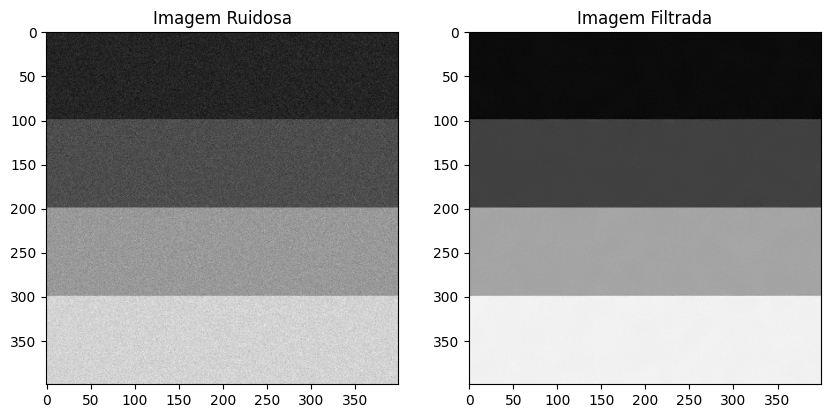

SNR da região 1 imagem ruidosa: 0.8138730038414597
SNR da região 2 imagem ruidosa: 1.5211151028530603
SNR da região 3 imagem ruidosa: 2.8672142488122776
SNR da região 4 imagem ruidosa: 3.852141870837442

SNR da região 1 imagem filtrada: 54.881398505551495
SNR da região 2 imagem filtrada: 90.4225546344578
SNR da região 3 imagem filtrada: 166.41508930926867
SNR da região 4 imagem filtrada: 261.0590389482633

Ganho da região 1: 67.43238594536581
Ganho da região 2: 59.44491279118712
Ganho da região 3: 58.040688580633585
Ganho da região 4: 67.76984018283574


In [23]:
# Seu código começa aqui #
# Aplicando o filtro na imagem ruidosa
img1_filter = cv.fastNlMeansDenoising(img1_noise, 7, 7, 4)

# Mostrando as imagens
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,14))

ax0.imshow(img1_noise, cmap='gray')
ax0.set_title('Imagem Ruidosa')
ax1.imshow(img1_filter, cmap='gray')
ax1.set_title('Imagem Filtrada')
plt.show()

# Calculando o SNR para as regiões
SNR_noise = np.divide(mean_noise,var_noise)

for i in range(len(SNR_noise)):
    print('SNR da região {} imagem ruidosa: {}'.format(i+1, SNR_noise[i]))

step1_filter = img1_filter[0:100,:]
step2_filter = img1_filter[100:200,:]
step3_filter = img1_filter[200:300,:]
step4_filter = img1_filter[300:,:]

mean_filter = []
mean_filter.append(np.mean(step1_filter))
mean_filter.append(np.mean(step2_filter))
mean_filter.append(np.mean(step3_filter))
mean_filter.append(np.mean(step4_filter))

var_filter = []
var_filter.append(np.var(step1_filter))
var_filter.append(np.var(step2_filter))
var_filter.append(np.var(step3_filter))
var_filter.append(np.var(step4_filter))

SNR_filter = np.divide(mean_filter,var_filter)

print()
for i in range(len(SNR_filter)):
    print('SNR da região {} imagem filtrada: {}'.format(i+1, SNR_filter[i]))

# Calculando o ganho
ganho = np.divide(SNR_filter,SNR_noise)

print()
for i in range(len(ganho)):
    print('Ganho da região {}: {}'.format(i+1, ganho[i]))


# Seu código termina aqui #

# Comentários:
# O ganho percebido nessa filtragem é considerável, de modo que é possível perceber uma redução 
# na variância de cada região, já que a média deve continuar a mesma.

### 2) Filtragem do Ruído dependente do sinal (Poisson) (3.5/10.0)

Agora vamos trabalhar com um tipo de ruído que possui dependência com sinal: o ruído Poisson.

<center><img src="https://raw.githubusercontent.com/LAVI-USP/SEL0449-SEL5895_2023/main/imagens/pratica_07/RuidoPoisson.gif" style="width:836px;height:266px;" width="980" height="300"></center>

<center><caption><b> Figura 1:</b> Imgens degradadas com diferentes níveis de ruído Poisson.</b></caption></center>

Esse ruído é comumente encontrado em dispositivos que se valem da contagem de fótons para a aquisição de imagem, como por exemplo exames de raios X (mamografia, tomografia, fluoroscopia e etc). De forma geral, quanto mais fótons contados pelos detectores, maior será o valor de intensidade do pixel. Contudo, devido à variação no número de fótons detectados, o valor de um pixel é influenciado por uma degradação cuja variância é proporcional à intensidade de luz captada por aquele pixel.

2.1) Para entendermos melhor esse tipo de ruído, siga as instruções abaixo:

1. Insira ruído Poisson na imagem degrau. Para isso vamos usar uma função de nome ```InsertNoisePoisson```. Já disponibilizamos o escopo da função e uma descrição das entradas e saídas. Comente o que cada linha da função está exercendo.
2. Mostre, lado a lado, a imagem original, a imagem degradada e a imagem contendo somente o ruído Poisson (que fora adicionado à imagem original).
3. Calcule a média e variância sobre cada degrau de cinza para a imagem ruidosa. Em seguida plote o gráfico de Média (Eixo X) e Variância (Eixo Y).
4. Comente sobre o comportamento da variância em relação à média. Faça um comparativo em relação ao exercício 1.1 .

In [ ]:
def InsertNoisePoisson(img):
  '''
  Entrada:
    - img: Imagem de entrada (uint8).

  Saída:
    - imgNoisy: Imagem com ruído Poisson .
  '''
  nRows, nCols = img.shape
  poissonNoise = np.sqrt(1*img)*np.random.normal(size=(nRows,nCols))
  imgNoisy = img + poissonNoise

  return imgNoisy

# Seu código começa aqui #

# Seu código termina aqui #

# Comentários:

2.2) Utilizando a função “cv.fastNlMeansDenoising”, com os mesmos parâmetros de filtragem da questão 1.2 :

1. Faça a filtragem da imagem.
```python
ImgFiltrada = cv.fastNlMeansDenoising(ImgRuidosa, 7, 7, 4)
```

2. Mostre lado a lado, a imagem filtrada e a ruidosa.

3. Calcule e mostre a relação sinal ruído (*Signal Noise Ratio* - SNR) dividindo a média do sinal (μ) pelo desvio padrão (σ) para cada uma das quatro regiões. Fazer esse cálculo tanto para imagem filtrada quanto para a imagem ruidosa.

4.  Calcule o ganho de qualidade da imagem por meio da divisão entre o SNR depois da filtragem com o antes da filtragem. O que se pode concluir ao comparar com o resultado do item 4 da questão 1.2?


In [ ]:
# Seu código começa aqui #

# Seu código termina aqui #

# Comentários:

### 3) Filtragem de Ruído Poisson utilizando Transformada de Anscombe (3.5/10.0)

Nesta terceira parte, vamos apresentar uma outra forma de filtragem utilizando uma ferramenta de establização de variância. Para esse caso, utilizaremos a transformada de Anscombe. Siga os passos abaixo:

1. Insira ruído Poisson na imagem degrau.
2. Aplique sobre a imagem degradada a estabilização da variância por meio da transformada de Anscombe, segundo a fórmula :


$$ f(z) = 2 (z + 3/8 )^{1/2} $$

<br>onde f(z) é a imagem no domínio de Anscombe e 'z' é a imagem ruidosa, que será estabilizada.</br>

3. Calcule a média e variância sobre cada degrau de cinza da imagem ***f(z)***, pós estabilização. Comente sobre o comportamento da variância em relação às diferentes médias quando utiliza-se a transformada de Anscombe.

4. Após a aplicação da transformada de Anscombe, o ruído passou a ser independente do sinal e com variância igual a 1. Dessa forma, ao utilizarmos a função “cv.fastNlMeansDenoising”, o parâmetro 'h' deve ser igual a 1. Faça a filtragem da imagem no domínio de Anscombe com os parâmetros sugeridos abaixo:
```python
ImgFiltrada = cv.fastNlMeansDenoising(ImgRuidosa, 1, 7, 4)
```

5. Como a imagem filtrada está no domínio de Anscombe, é necessário retorná-la para o domínio inicial da imagem. Portanto, aplique a transformada inversa de Anscombe:

$$ I(D) = (D/2)^{2} - 1/8 $$

onde I(D) é a imagem filtrada no domínio de original e 'D' é a imagem  filtrada no domínio de Anscombe.

6. Mostre lado a lado, a imagem filtrada e a ruidosa.

7. Calcule e mostre a relação sinal ruído (*Signal Noise Ratio* - SNR) dividindo a média do sinal (μ) pelo desvio padrão (σ) para cada uma das três regiões. Fazer este cálculo tanto para imagem filtrada quanto para a imagem ruidosa.

8.  Calcule o ganho de qualidade da imagem por meio da divisão entre o SNR depois da filtragem com o antes da filtragem. O que se pode concluir ao comparar com o resultado da questão 2.2?

9. Compare a imagem filtrada (obtida neste exercício) com a imagem filtrada do exercício 2.2 e comente os resultados.




In [ ]:
# Seu código começa aqui #

# Seu código termina aqui #

# Comentários: